In [129]:
import os
import glob
from pathlib import Path

import requests
import difflib
import random


import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib notebook
import mplcursors
from ipywidgets import widgets

In [72]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [73]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.columns)

Index(['player', 'aces', 'bk_pts', 'bp_saved', 'crosscourt', 'deep', 'dfs',
       'down_middle', 'down_the_line', 'err_deep', 'err_net', 'err_wide',
       'err_wide_deep', 'first_aces', 'first_forced', 'first_in', 'first_pts',
       'first_pts_won', 'first_unret', 'first_won', 'first_won_lte_3_shots',
       'forced_err', 'in_play', 'in_play_won', 'induced_forced', 'inside_in',
       'inside_out', 'net_pts', 'net_unforced', 'net_winner', 'passed_at_net',
       'passing_shot_induced_forced', 'pt_ending', 'pts', 'pts_won',
       'pts_won_lte_3_shots', 'return_forced', 'return_pts', 'return_pts_won',
       'returnable', 'returnable_won', 'second_aces', 'second_forced',
       'second_in', 'second_pts', 'second_pts_won', 'second_unret',
       'second_won', 'second_won_lte_3_shots', 'serve_pts', 'serve_return',
       'shallow', 'shots', 'shots_in_pts_lost', 'shots_in_pts_won', 'snv_pts',
       'total_shots', 'unforced', 'unforced_bh', 'unforced_fh', 'unret',
       'very_deep', 'w

In [93]:
def multi_checkbox_widget(descriptions):
    """ Widget with a search field and lots of checkboxes """
    search_widget = widgets.Text()
    options_dict = {description: widgets.Checkbox(description=description, value=False) for description in descriptions}
    options = [options_dict[description] for description in descriptions]
    options_widget = widgets.VBox(options, layout={'overflow': 'scroll'})
    multi_select = widgets.VBox([search_widget, options_widget])

    # Wire the search field to the checkboxes
    def on_text_change(change):
        search_input = change['new']
        if search_input == '':
            # Reset search field
            new_options = [options_dict[description] for description in descriptions]
        else:
            # Filter by search field using difflib.
            close_matches = difflib.get_close_matches(search_input, descriptions, cutoff=0.0)
            new_options = [options_dict[description] for description in close_matches]
        options_widget.children = new_options

    search_widget.observe(on_text_change, names='value')
    return multi_select

# Example of using the widget

# Get lots of words for our options
words_url = 'https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain'
response = requests.get(words_url)
response.raise_for_status()
#words = response.text
#words = set([word.lower() for word in words.splitlines()])
descriptions = df.columns #random.sample(words, 100)

widget = multi_checkbox_widget(descriptions)
widget

In [297]:
selected_options = [w.description for w in widget.children[1].children if w.value]
print(selected_options)
eps = 0.001
min_samples= 1

['crosscourt', 'shots', 'shots_in_pts_lost', 'shots_in_pts_won', 'total_shots']


In [298]:
# split data
X = df.loc[:, df.columns != 'player']
labels = df['player']
X = df[selected_options]

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled)

#cluster
dbscan = DBSCAN(eps=eps,min_samples=min_samples)
clusterlabels = dbscan.fit_predict(X_scaled)
print(clusterlabels)
print(len(X.columns))

[  0   1   2   3   4   5   6   7   8   0   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40   0  41  42  43  44   0  45   0   0   0  46  47
  48  49  50  51  52  53  54  55  56   0   0  57  58  59  60  61  62  63
   0  64  65  66  67  68  69  70  71  72  73  74  75  76  77  65  78  65
  79  80  81  82  83  84  85   0  86  65  87  88  89  90  65   0  91   0
  19  92  66  75  93  94  95   0  69  96  97   0  98  99   0 100   0 101
 102 103 104 105   0 106   0 107 108 109   0   0 110 111 112   0   0 113
 114 115 116   0 117   0   0   0 118   0   0 119 120   0   0   0  28   0
   0   0 121   0   0   0 122 123 124 125   0   0   0   0   0   0   0   0
   0   0 126 127 128   0 129 130 130   0 131 132 133 134 135 136   0 137
 138 139 111 140 141 119   0 142   0 143 144 145   0  19 146 147 148   0
   0   0   0 149 150 151 152   0   0   0 153 154 155 124 148   0 156   0
 157   0 158   0   0 148 159 126 158   0 160   0 16

In [299]:
#umap dimension reduction
#aumap = umap.UMAP(n_components = 2)
#data = aumap.fit_transform(X)

#pca dimension reduction
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(X)
data = pca.transform(X)
#print(pca.explained_variance_ratio_)
#print(pca.components_)

In [300]:
# search dashboard
text = widgets.Text()
display(text)

def handle_submit(sender):
    idx = labels[labels==text.value]
    point = None
    if(len(idx)>0):
        pointidx = idx.index[0]
        point = data[pointidx]
    print(text.value,": ",point)

text.on_submit(handle_submit)

Text(value='')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


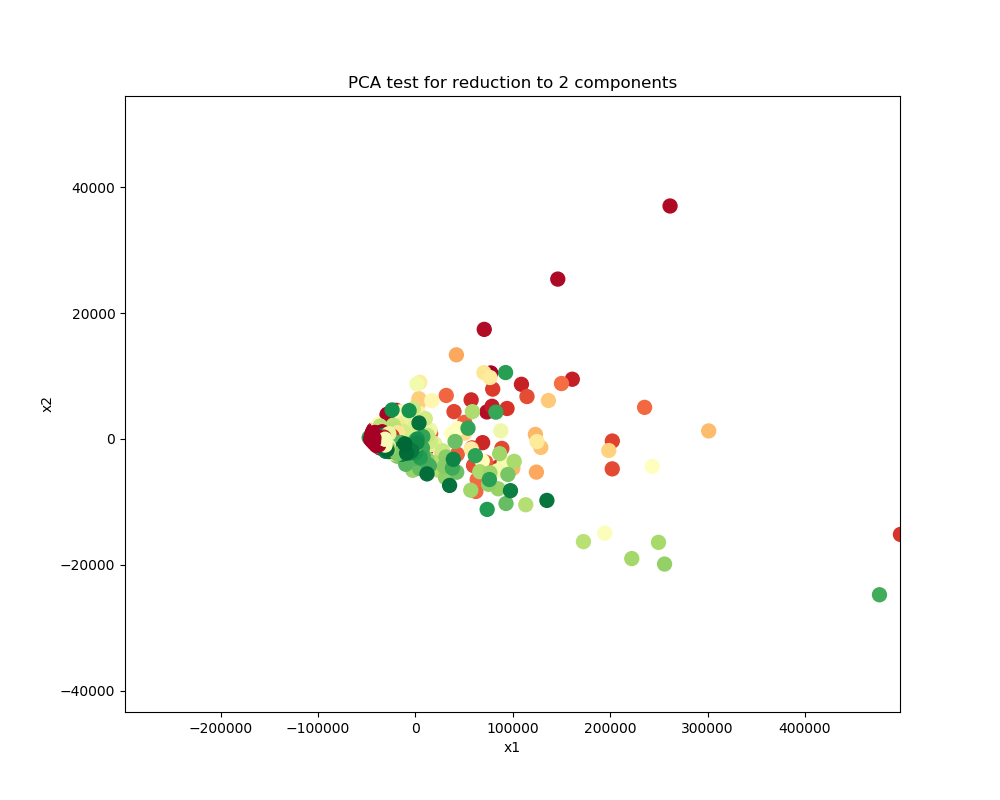

In [301]:
#plot data
x = data[:,0]
y = data[:,1]
names = labels.to_numpy()
param = 'winners'
c = clusterlabels #np.log(X[param].to_numpy()+0.001) #np.random.randint(1,5,size=len(x))
#c = X[param].to_numpy()
maximum = np.max(c)
minimum = np.min(c)
print(type(names),type(c))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([(names[n]+':'+(str)(c[n])) for n in ind["ind"]])) #, 
                           #" ".join([(str)(c[n]) for n in ind["ind"]]))
    
    
#     "{}:{}".format(" ".join([names[n] for n in ind["ind"]]),
#                        " ".join([c[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
fig.set_size_inches(10,8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('PCA test for reduction to 2 components')
plt.show()
plt.clim(minimum, maximum)
#plt.colorbar(axp,cmap = c)


sources
<br>
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
<br>
https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e
<br>
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
<br>
https://gist.github.com/pbugnion/5bb7878ff212a0116f0f1fbc9f431a5c (better checklist)
<br>